Now that you've learned about random forests and decision trees let's do an exercise in accuracy. You know that random forests are basically a collection of decision trees. But how do the accuracies of the two models compare?

So here's what you should do. Pick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can.

Now try to match that with the simplest random forest you can. For our purposes measure simplicity with runtime. Compare that to the runtime of the decision tree. This is imperfect but just go with it.

Hopefully out of this you'll see the power of random forests, but also their potential costs. Remember, in the real world you won't necessarily be dealing with thousands of rows. It could be millions, billions, or even more.

Submit a link to your models below.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

In [71]:
df = pd.read_csv('2017.csv')

In [72]:
df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [73]:
df.dtypes

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

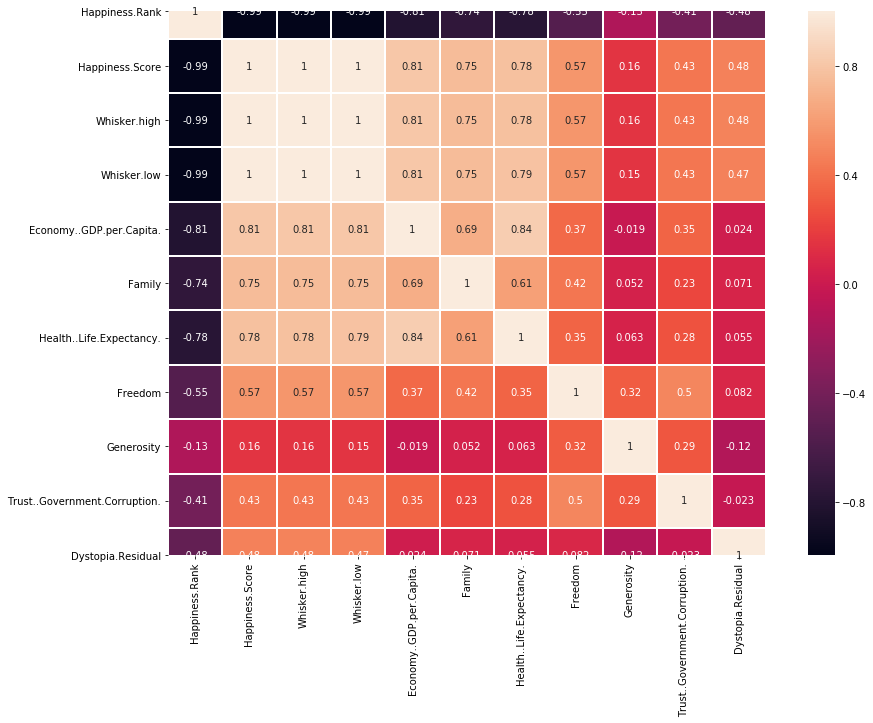

In [74]:
# produce heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), square=True, annot=True, linewidths=1)
plt.show()

In [75]:
features = ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.']

In [76]:
#df['health_econ'] = df['Health..Life.Expectancy.'] * df['Economy..GDP.per.Capita.']

In [77]:
#features.append('health_econ')
#features.remove('Health..Life.Expectancy.')
#features.remove('Economy..GDP.per.Capita.')

In [78]:
df2 = df.copy()
df2 = df2.drop('Happiness.Score', 1)
df2 = df2.drop('Country', 1)

#X = df2
X = df[features]
Y = df['Happiness.Score']

In [79]:
df2.head()

,Happiness.Rank,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,1,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,2,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,3,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,4,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,5,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [80]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

In [190]:
#x_train = x_train.reshape(-1, 1)
#y_train = y_train.reshape(-1, 1)

# time our tree
import time
start_time = time.time()

# Initialize and train our tree.
#decision_tree = tree.DecisionTreeRegressor()
decision_tree = tree.DecisionTreeRegressor(max_features=1, max_depth=4, random_state =1500
)

print("--- %s seconds ---" % (time.time() - start_time))

decision_tree.fit(x_train, y_train)

--- 0.0 seconds ---


DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=1,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1500, splitter='best')

In [186]:
score = cross_val_score(decision_tree, x_test, y_test, cv=5)
print(score)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

[0.80459621 0.5757306  0.40489555 0.17263207 0.70639607]
Accuracy: 0.53 (+/- 0.45)


In [195]:
start_time = time.time()

rfr = ensemble.RandomForestRegressor(max_features=1, max_depth=4, random_state =1500)

print("--- %s seconds ---" % (time.time() - start_time))

rfr.fit(x_train, y_train)

--- 0.0 seconds ---


C:\Users\conno\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features=1, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1500,
                      verbose=0, warm_start=False)

In [197]:
score = cross_val_score(rfr, x_test, y_test, cv=5)
print(score)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

[0.77125611 0.56918046 0.89130855 0.5298846  0.78761047]
Accuracy: 0.71 (+/- 0.28)


In [200]:
ols = sm.OLS(Y, X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Happiness.Score   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2760.
Date:                Thu, 21 Nov 2019   Prob (F-statistic):                   2.77e-132
Time:                        19:44:20   Log-Likelihood:                         -172.14
No. Observations:                 155   AIC:                                      350.3
Df Residuals:                     152   BIC:                                      359.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Economy..GDP.per.Capita.     0.4615      0.285      1.622      0.107      -0.101       1.024
Family                       3.2200      0.175     18.443      0.000       2.875       3.565
Health..Life.Expectancy.     1.7428      0.469      3.718      0.000       0.817       2.669
==============================================================================
Omnibus:                       13.219   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.706
Skew:                           0.516   Prob(JB):                     0.000143
Kurtosis:                       4.295   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""